# WeatherPy
This is project to answer the question: "What's the weather like as we approach the equator?", using data from OpenWeather.com pulled for at least 500 randomly chosen cities on the day of July 2, 2019. The data retrieved and pngs of the plots are stored in the output_data directory. Here are three observable trends noted from the results:

1) Our first scatterplot, Max Temperature by Latitude shows a very strong relation ship between the maximum observed temperature for a city and its latitude, however the fulcrum of this observation is not a the equator, but at about 20 degrees N latitude, with max temps dropping off on either side of that. This would make sense as the Northern Hemisphere is currently experiencing its summer. One weakness of this data is that our sample data appears to include a larger number of cities in the Northern Hemisphere than in the Southern, but nevertheless, this trend is very strong.

2) Humidity at various latitudes shows a more complex relationship. There appears to be a small band of high humidity within the 10 degrees of latitude around the equator, then humidity drops significantly at around both 20 degrees south and 20 degrees north of the equator, and then humidity rises again as we move toward the poles on either side.

3) The Cloudiness by Latitude plot is a bit difficult to interpret because the disproportionate number of cities with cloudiness values of 0, 100, and for some reason 20, 40, and 75 obscures the number of cities that occurring at those lines. However, overall it appears that on this day, the Northern Hemisphere is cloudier than the Southern Hemisphere, with no strong relationship based on distance from the equator.

4) Wind speeds across the globe are mostly 10 mph or under. There are a lesser number of cities having wind speeds between 10 and 15 mph, and then only about 10% of cities having wind speeds above 15 mph. If there is an observable relationship between latitude and wind speed, it is that winds are very slightly higher the farther north one goes.

In [13]:
# Dependencies and Setup
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
num_cities = len(cities)
if num_cities < 500:
    print(f"Only {num_cities} were generated. The program will end and you may try again.")
    exit()

print(f"We will attempt to collect OpenWeather data for {num_cities} cities.")

We will attempt to collect OpenWeather data for 619 cities.


In [15]:
# Build initial dataframe and query arguments
city_weather = pd.DataFrame(cities, columns=["City"])
city_weather["Max Temperature"] = ""
city_weather["Humidity"] = ""
city_weather["Cloudiness"] = ""
city_weather["Wind Speed"] = ""
city_weather["Latitude"] = ""
city_weather["Country"] = ""

# Variables to build url and specify imperial units rather than default metric
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#test_url = f"{url}appid={api_key}&units={units}&q="

# Key word arguments to pass in units setting and API key
settings = { "units": units, "appid": api_key}

# list to pass in desired weather metrics
weather_stats = ["id","main.temp_max","main.humidity","clouds.all","wind.speed","coord.lat","sys.country"]

openweather_hits = 0

#print(f"Settings = {settings}")
#print(f"weather = {weather_stats}")

In [16]:
# Set up list of records at which to sleep (because of OpenWeather hit limits)
sleep_list = np.arange(60,num_cities,60)

# Make an API call for each city
for index, row in city_weather.iterrows():
    
    # Sleep after every 60 calls
    if index in sleep_list:
        print("Sleeping for 61 seconds...")
        time.sleep(61)
    
    city = row["City"]

    try:
        response = owm.get_current(city,**settings)
        city_data = response(*weather_stats)
        #print(f'city_data is: {city_data}')   
        print(f"Processing Record '{index}' for city: '{city}'. City number:'{city_data[0]}'") 

        city_weather.loc[index,"Max Temperature"] = (city_data[1])
        city_weather.loc[index,"Humidity"] = city_data[2]
        city_weather.loc[index,"Cloudiness"] = city_data[3]
        city_weather.loc[index,"Wind Speed"] = (city_data[4])
        city_weather.loc[index,"Latitude"] = (city_data[5])
        city_weather.loc[index,"Country"] = (city_data[6])
    
    except Exception:
        print(f"The city {city} was not found on OpenWeather.")

print("-----------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------")

Processing Record '0' for city: 'hasaki'. City number:'2112802'
Processing Record '1' for city: 'hofn'. City number:'2630299'
Processing Record '2' for city: 'kapaa'. City number:'5848280'
Processing Record '3' for city: 'avarua'. City number:'4035715'
Processing Record '4' for city: 'meulaboh'. City number:'1214488'
Processing Record '5' for city: 'xaltianguis'. City number:'3515643'
Processing Record '6' for city: 'libertador general san martin'. City number:'3846915'
Processing Record '7' for city: 'sola'. City number:'151211'
Processing Record '8' for city: 'rikitea'. City number:'4030556'
Processing Record '9' for city: 'huarmey'. City number:'3939168'
Processing Record '10' for city: 'vaini'. City number:'1273574'
Processing Record '11' for city: 'yellowknife'. City number:'6185377'
Processing Record '12' for city: 'severo-kurilsk'. City number:'2121385'
Processing Record '13' for city: 'tuktoyaktuk'. City number:'6170031'
The city jiddah was not found on OpenWeather.
The city af

Processing Record '124' for city: 'lanquin'. City number:'3594315'
Processing Record '125' for city: 'san juan'. City number:'3837213'
Processing Record '126' for city: 'tasiilaq'. City number:'3424607'
The city paucartambo was not found on OpenWeather.
Processing Record '128' for city: 'lagoa'. City number:'2267254'
Processing Record '129' for city: 'honningsvag'. City number:'779554'
Processing Record '130' for city: 'adre'. City number:'245669'
Processing Record '131' for city: 'katobu'. City number:'1640972'
Processing Record '132' for city: 'lompoc'. City number:'5367788'
Processing Record '133' for city: 'mansa'. City number:'1263623'
Processing Record '134' for city: 'green river'. City number:'5826559'
Processing Record '135' for city: 'banyumas'. City number:'1650095'
The city louisbourg was not found on OpenWeather.
Processing Record '137' for city: 'codrington'. City number:'2160063'
Processing Record '138' for city: 'shahr-e babak'. City number:'115781'
Processing Record '1

Processing Record '250' for city: 'zhezkazgan'. City number:'1516589'
Processing Record '251' for city: 'mount isa'. City number:'2065594'
Processing Record '252' for city: 'aklavik'. City number:'5882953'
Processing Record '253' for city: 'pimentel'. City number:'3389609'
The city safwah was not found on OpenWeather.
Processing Record '255' for city: 'xichang'. City number:'1789647'
The city marcona was not found on OpenWeather.
Processing Record '257' for city: 'esquipulas palo gordo'. City number:'3595778'
Processing Record '258' for city: 'nantucket'. City number:'4944903'
Processing Record '259' for city: 'kamskiye polyany'. City number:'553350'
Processing Record '260' for city: 'butaritari'. City number:'2110227'
Processing Record '261' for city: 'kaa-khem'. City number:'1500973'
Processing Record '262' for city: 'sfantu gheorghe'. City number:'667306'
Processing Record '263' for city: 'ambilobe'. City number:'1082243'
Processing Record '264' for city: 'los llanos de aridane'. Ci

Processing Record '373' for city: 'wanaka'. City number:'2184707'
Processing Record '374' for city: 'price'. City number:'5545269'
Processing Record '375' for city: 'cururupu'. City number:'3401148'
The city vaitupu was not found on OpenWeather.
Processing Record '377' for city: 'ratzeburg'. City number:'2850132'
Processing Record '378' for city: 'luwuk'. City number:'1637001'
Processing Record '379' for city: 'westport'. City number:'4845585'
Processing Record '380' for city: 'lancaster'. City number:'5197079'
The city sofiysk was not found on OpenWeather.
Processing Record '382' for city: 'harnosand'. City number:'2707684'
Processing Record '383' for city: 'hailey'. City number:'5594956'
Processing Record '384' for city: 'bani'. City number:'34915'
Processing Record '385' for city: 'piopio'. City number:'3874453'
Processing Record '386' for city: 'bonfim'. City number:'3379316'
Processing Record '387' for city: 'katherine'. City number:'2068655'
Processing Record '388' for city: 'sho

Processing Record '498' for city: 'ibra'. City number:'287832'
Processing Record '499' for city: 'mastic beach'. City number:'5126209'
Processing Record '500' for city: 'ternate'. City number:'1682474'
Processing Record '501' for city: 'cehegin'. City number:'2519651'
Processing Record '502' for city: 'kathu'. City number:'991664'
Processing Record '503' for city: 'kamaishi'. City number:'2112444'
Processing Record '504' for city: 'udachnyy'. City number:'2014624'
Processing Record '505' for city: 'kuandian'. City number:'2036283'
Processing Record '506' for city: 'syamzha'. City number:'485351'
Processing Record '507' for city: 'taree'. City number:'2147381'
Processing Record '508' for city: 'hambantota'. City number:'1244926'
Processing Record '509' for city: 'bandundu'. City number:'2317397'
Processing Record '510' for city: 'burnie'. City number:'2173125'
Processing Record '511' for city: 'santa fe'. City number:'3836277'
Processing Record '512' for city: 'bose'. City number:'64573

In [17]:
# Create new df without rows where city was not found
weather_data_df = city_weather[city_weather["Country"] != ""]

# Give message if deleted cities resulted in sample of less than 500
weather_data_length = len(weather_data_df)
if weather_data_length < 500:
    print(f'OpenWeather only had information for {weather_data_length} cities. You '\
    'may wish to run the program again to meet the minimum desired sample of 500 cities.')

# Write data to file
weather_data_df.to_csv(output_data_file)

weather_data_df.head()

,City,Max Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Country
0,hasaki,69.8,94,75,3.36,35.73,JP
1,hofn,42.23,78,49,10.11,64.25,IS
2,kapaa,81,83,8,3.36,22.08,US
3,avarua,69.8,64,25,18.34,-21.21,CK
4,meulaboh,82.73,76,100,8.68,4.14,ID


#### Latitude vs. Temperature Plot

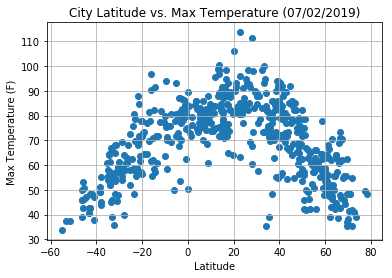

In [18]:
# Create plot from latitude and max temp data
plt.scatter(weather_data_df["Latitude"], weather_data_df["Max Temperature"], marker="o")

# Add labels
plt.title("City Latitude vs. Max Temperature (07/02/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save plot to file
plt.savefig("output_data/latitude_by_maxtemp.png")

# Show the plot
plt.show()

#### Latitude vs. Humidity Plot

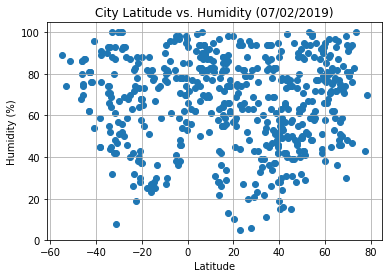

In [19]:
# Create plot from latitude and humidity data
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity"], marker="o")

# Add labels
plt.title("City Latitude vs. Humidity (07/02/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save plot to file
plt.savefig("output_data/latitude_by_humidity.png")

# Show the plot
plt.show()

#### Latitude vs. Cloudiness Plot

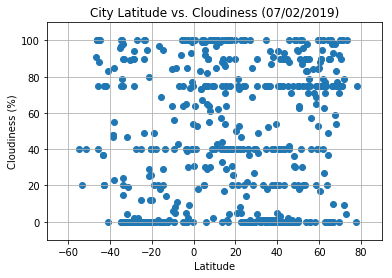

In [27]:
# Create plot from latitude and cloudiness data
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness"], marker="o")

# Define X and Y limits
plt.xlim(-70,90  )
plt.ylim(-10, 110 )

# Add labels
plt.title("City Latitude vs. Cloudiness (07/02/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save plot to file
plt.savefig("output_data/latitude_by_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

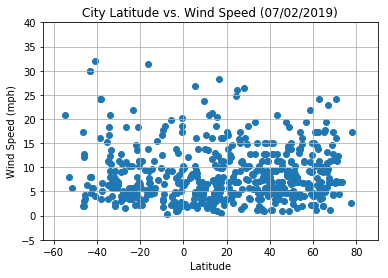

In [29]:
# Create plot from latitude and wind speed data
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed"], marker="o")

# Define X and Y limits
plt.xlim(-65,90  )
plt.ylim(-5, 40 )

# Add labels
plt.title("City Latitude vs. Wind Speed (07/02/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save plot to file
plt.savefig("output_data/latitude_by_windspeed.png")

plt.show()